In [1]:
### IMPORT SCIENTIFIC LIBRARIES ###
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import pandas as pd
from scipy.optimize import curve_fit

from functions import *
from alias import *

In [2]:
# fontsizes
plt.rcParams['font.size'] = 14
plt.rcParams['axes.labelsize'] = 18

In [3]:
###### IMPORT and REDUCE DATA ######
red = {}
for T in [160, 200, 300]:
    red[T] = pd.read_csv(f'./data/reddata/red_{T}K.csv')
    print(f'Loaded reduced data for {T}K')

Loaded reduced data for 160K
Loaded reduced data for 200K
Loaded reduced data for 300K


In [4]:
red[300]

,Q,omega,I,dI,Tr,T_self,Ki,Kf,Im,I-Im,S,dS
0,0.5,-11.0025,0.020456,0.002681,0.9,1,5.322590,5.8,0.001563,0.020728,0.019021,0.002681
1,0.5,-10.4950,0.004776,0.000885,0.9,1,5.345549,5.8,0.001594,0.003587,0.003306,0.000885
2,0.5,-9.9807,0.004453,0.000823,0.9,1,5.368715,5.8,0.001635,0.003176,0.002940,0.000823
3,0.5,-9.4902,0.005362,0.000776,0.9,1,5.390717,5.8,0.001682,0.004088,0.003799,0.000776
4,0.5,-8.9934,0.006480,0.000762,0.9,1,5.412910,5.8,0.001730,0.005213,0.004865,0.000762
...,...,...,...,...,...,...,...,...,...,...,...,...
407,1.5,28.0288,0.003240,0.000536,0.9,1,6.867845,5.8,0.001311,0.001425,0.001688,0.000536
408,1.5,28.5525,0.004842,0.000568,0.9,1,6.886221,5.8,0.001297,0.002781,0.003302,0.000568
409,1.5,29.0144,0.003023,0.000535,0.9,1,6.902388,5.8,0.001284,0.001257,0.001496,0.000535
410,1.5,29.5463,0.004567,0.000580,0.9,1,6.920959,5.8,0.001270,0.002557,0.003051,0.000580


# Detailed balance check
$$
\frac{S_{stokes}}{S_{anti-stokes}} = e^{\frac{\hbar \omega}{k_B T}}
$$

In [5]:
kB = 8.617333262e-2 # meV/K

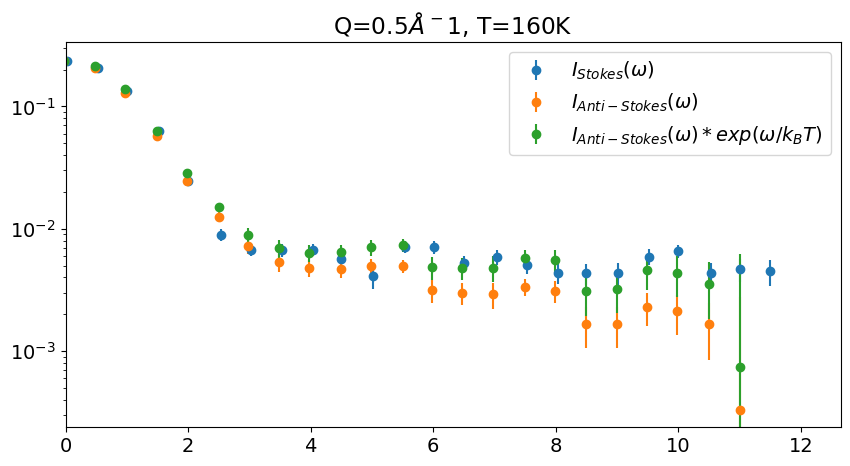

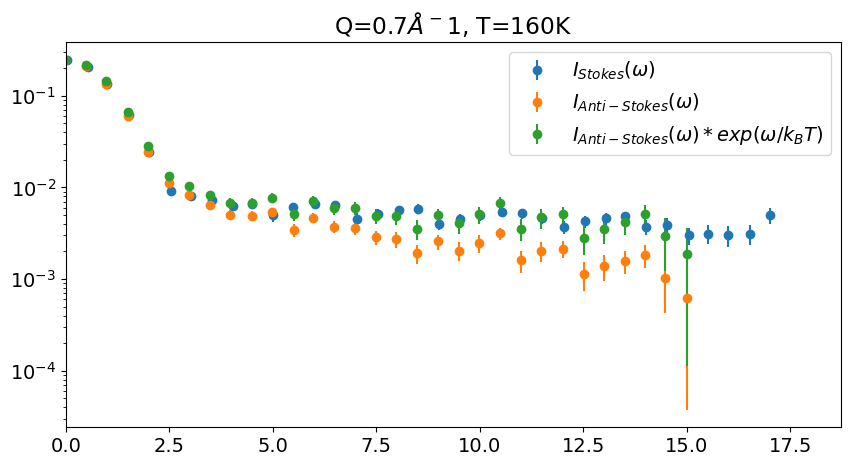

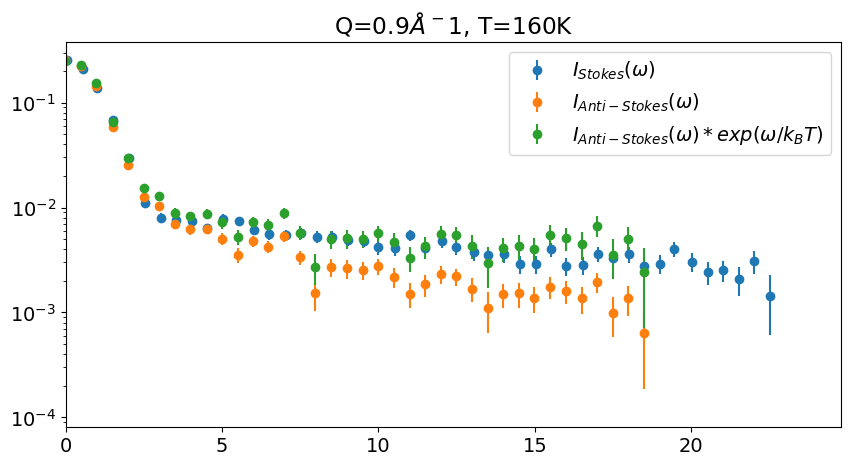

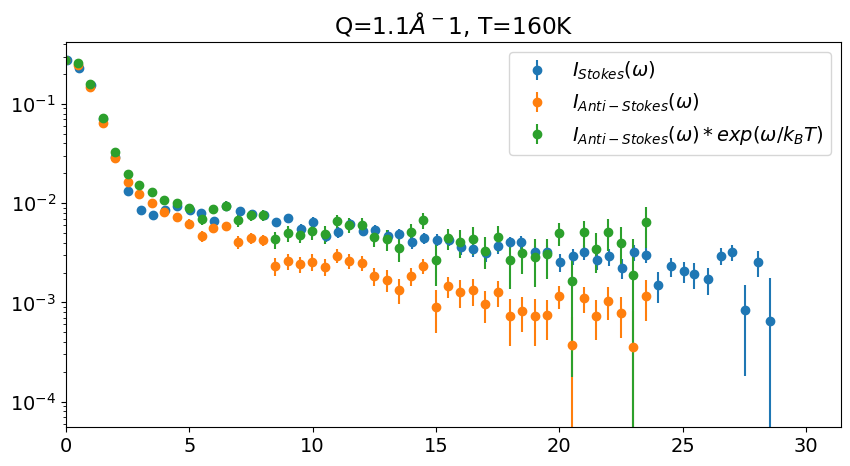

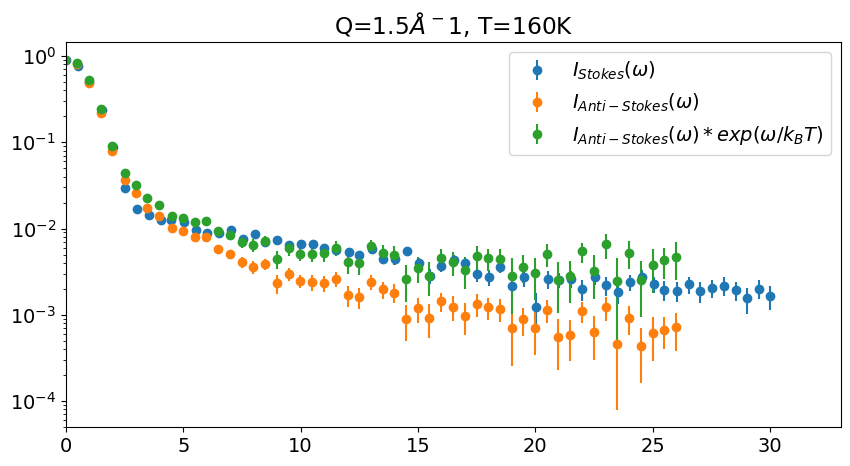

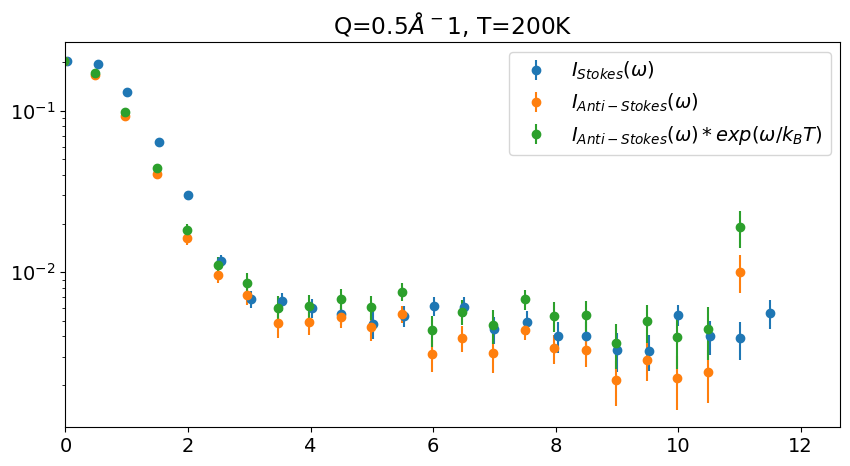

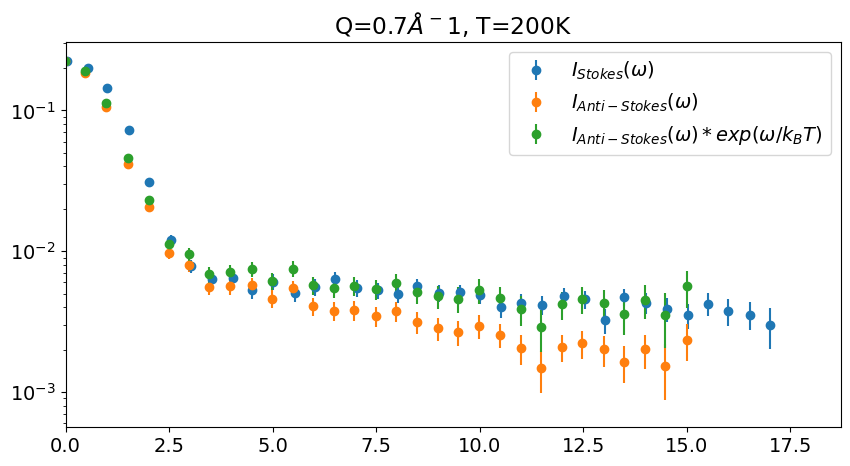

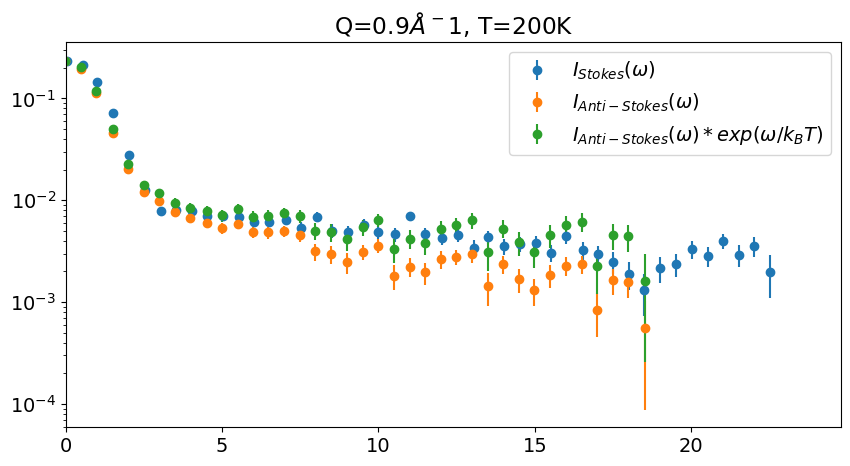

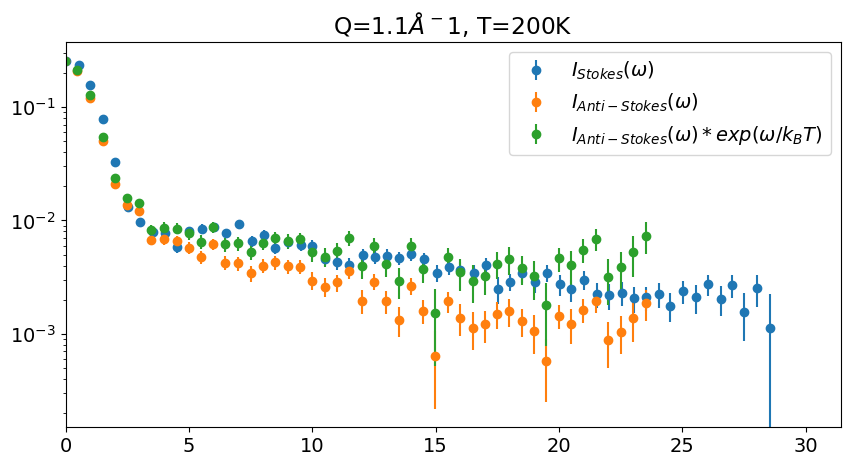

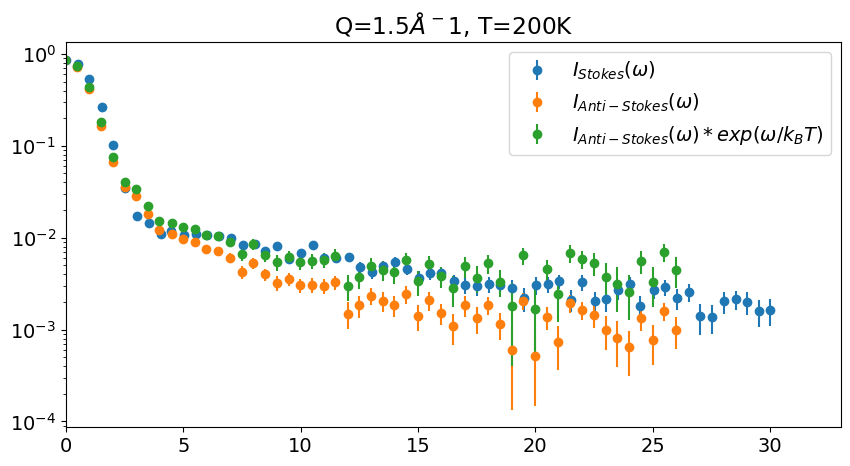

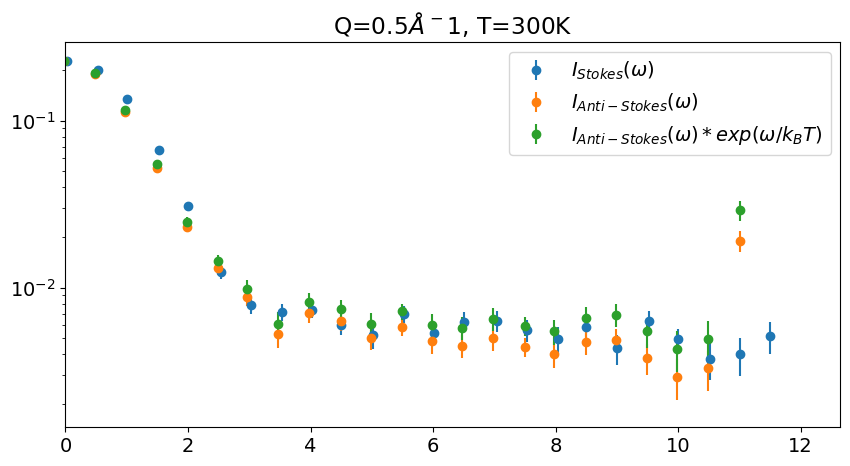

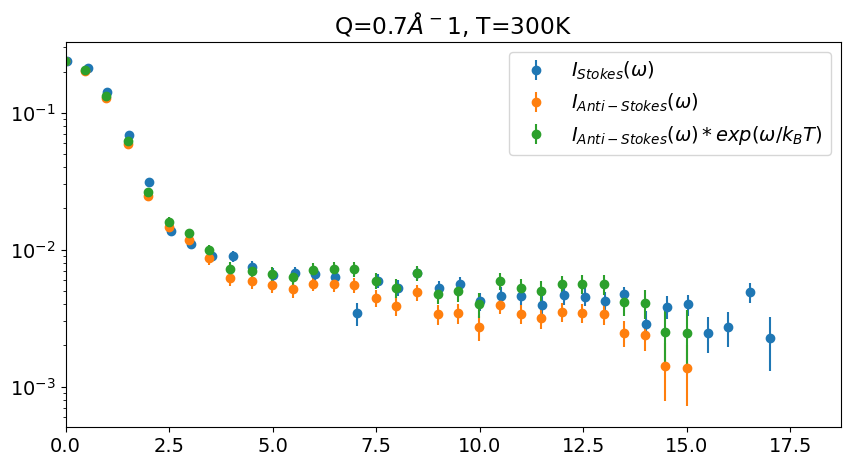

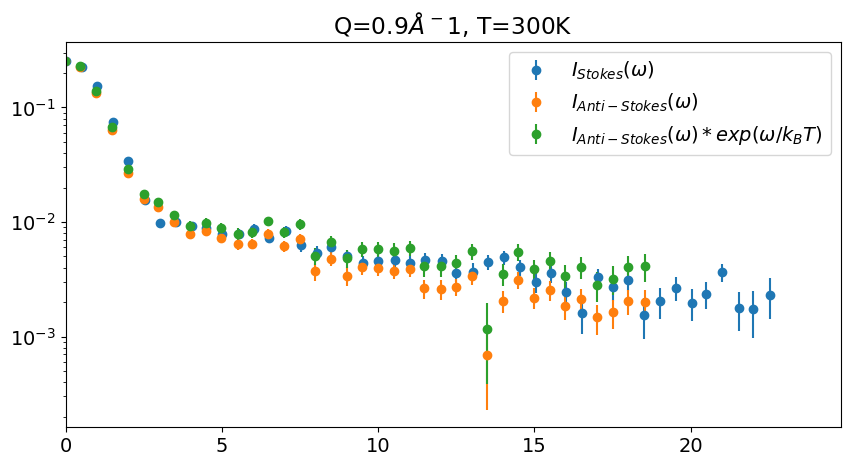

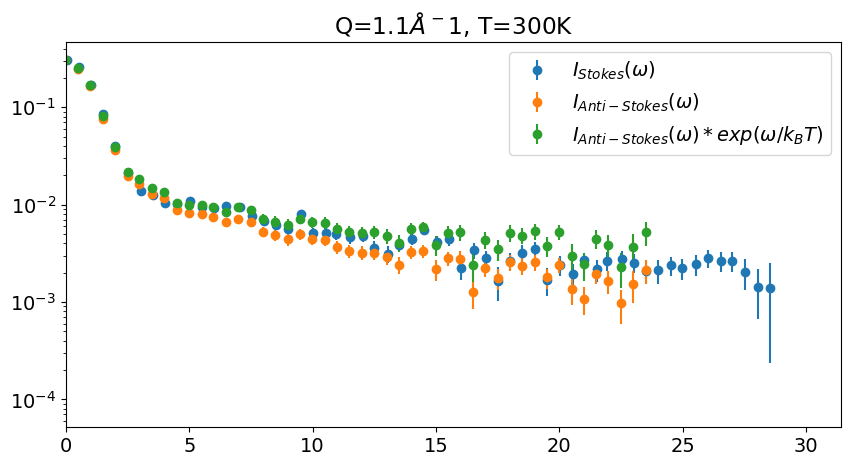

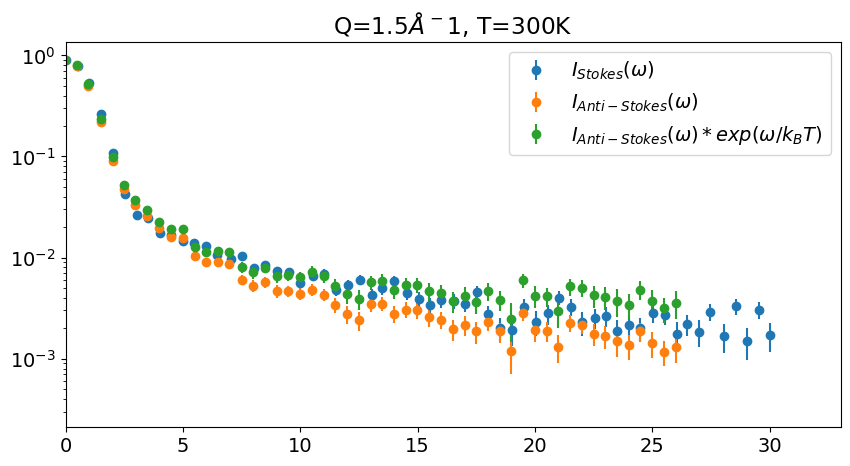

In [6]:
for T in [160, 200, 300]:
    for q in Qs:
        S = get_spec(red[T], q)

        plt.figure(figsize=(10,5))
        plt.title(f'Q={q}$\AA^{-1}$, T={T}K')

        plt.errorbar(S.omega, S.S, yerr=S.dS, fmt='o', label=r'$I_{Stokes}(\omega)$')
        plt.errorbar(-S.omega, S.S, yerr=S.dS, fmt='o', label=r'$I_{Anti-Stokes}(\omega)$')
        plt.errorbar(-S.omega, S.S * np.exp(-S.omega/(kB*T)), yerr=S.dS * np.exp(-S.omega/(kB*T)), fmt='o', label=r'$I_{Anti-Stokes}(\omega) * exp(\omega/k_BT)$')

        plt.xlim(0)
        plt.yscale('log')
        plt.legend()